# PROJECT - 19

# Fraud  Loan Prediction 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATASET

In [17]:
data=pd.read_csv("loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [19]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [22]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


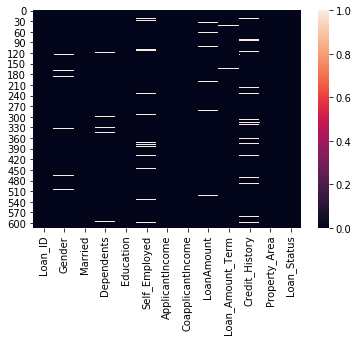

In [23]:
sns.heatmap(data.isnull())

In [24]:
data=data.fillna(data.mode().iloc[0])

In [26]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in data.columns[1:]:
   if data[col].dtype=='object':
    if len(list(data[col].unique()))<=2:
        le.fit(data[col])
        data[col]=le.transform(data[col])
        le_count +=1
print('{} columns were label encoded.',format(le_count))

{} columns were label encoded. 5


In [28]:
data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [29]:
data["Loan_ID"]=le.fit_transform(data["Loan_ID"])
data["Dependents"]=le.fit_transform(data["Dependents"])
data["Property_Area"]=le.fit_transform(data["Property_Area"])


In [30]:
data.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [31]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [32]:
data.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.037369,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.037369,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data.astype(float))
data

array([[0.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.00163132, 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00326264, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.99673736, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99836868, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ]])

In [35]:
df=pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.160637,0.743590,1.0,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0,1.0
5,0.008157,1.0,1.0,0.666667,0.0,1.0,0.065145,0.100703,0.373372,0.743590,1.0,1.0,1.0
6,0.009788,1.0,1.0,0.000000,1.0,0.0,0.027001,0.036384,0.124457,0.743590,1.0,1.0,1.0
7,0.011419,1.0,1.0,1.000000,0.0,0.0,0.035696,0.060096,0.215630,0.743590,0.0,0.5,0.0
8,0.013051,1.0,1.0,0.666667,0.0,0.0,0.047693,0.036624,0.230101,0.743590,1.0,1.0,1.0
9,0.014682,1.0,1.0,0.333333,0.0,0.0,0.156970,0.263230,0.492041,0.743590,1.0,0.5,0.0


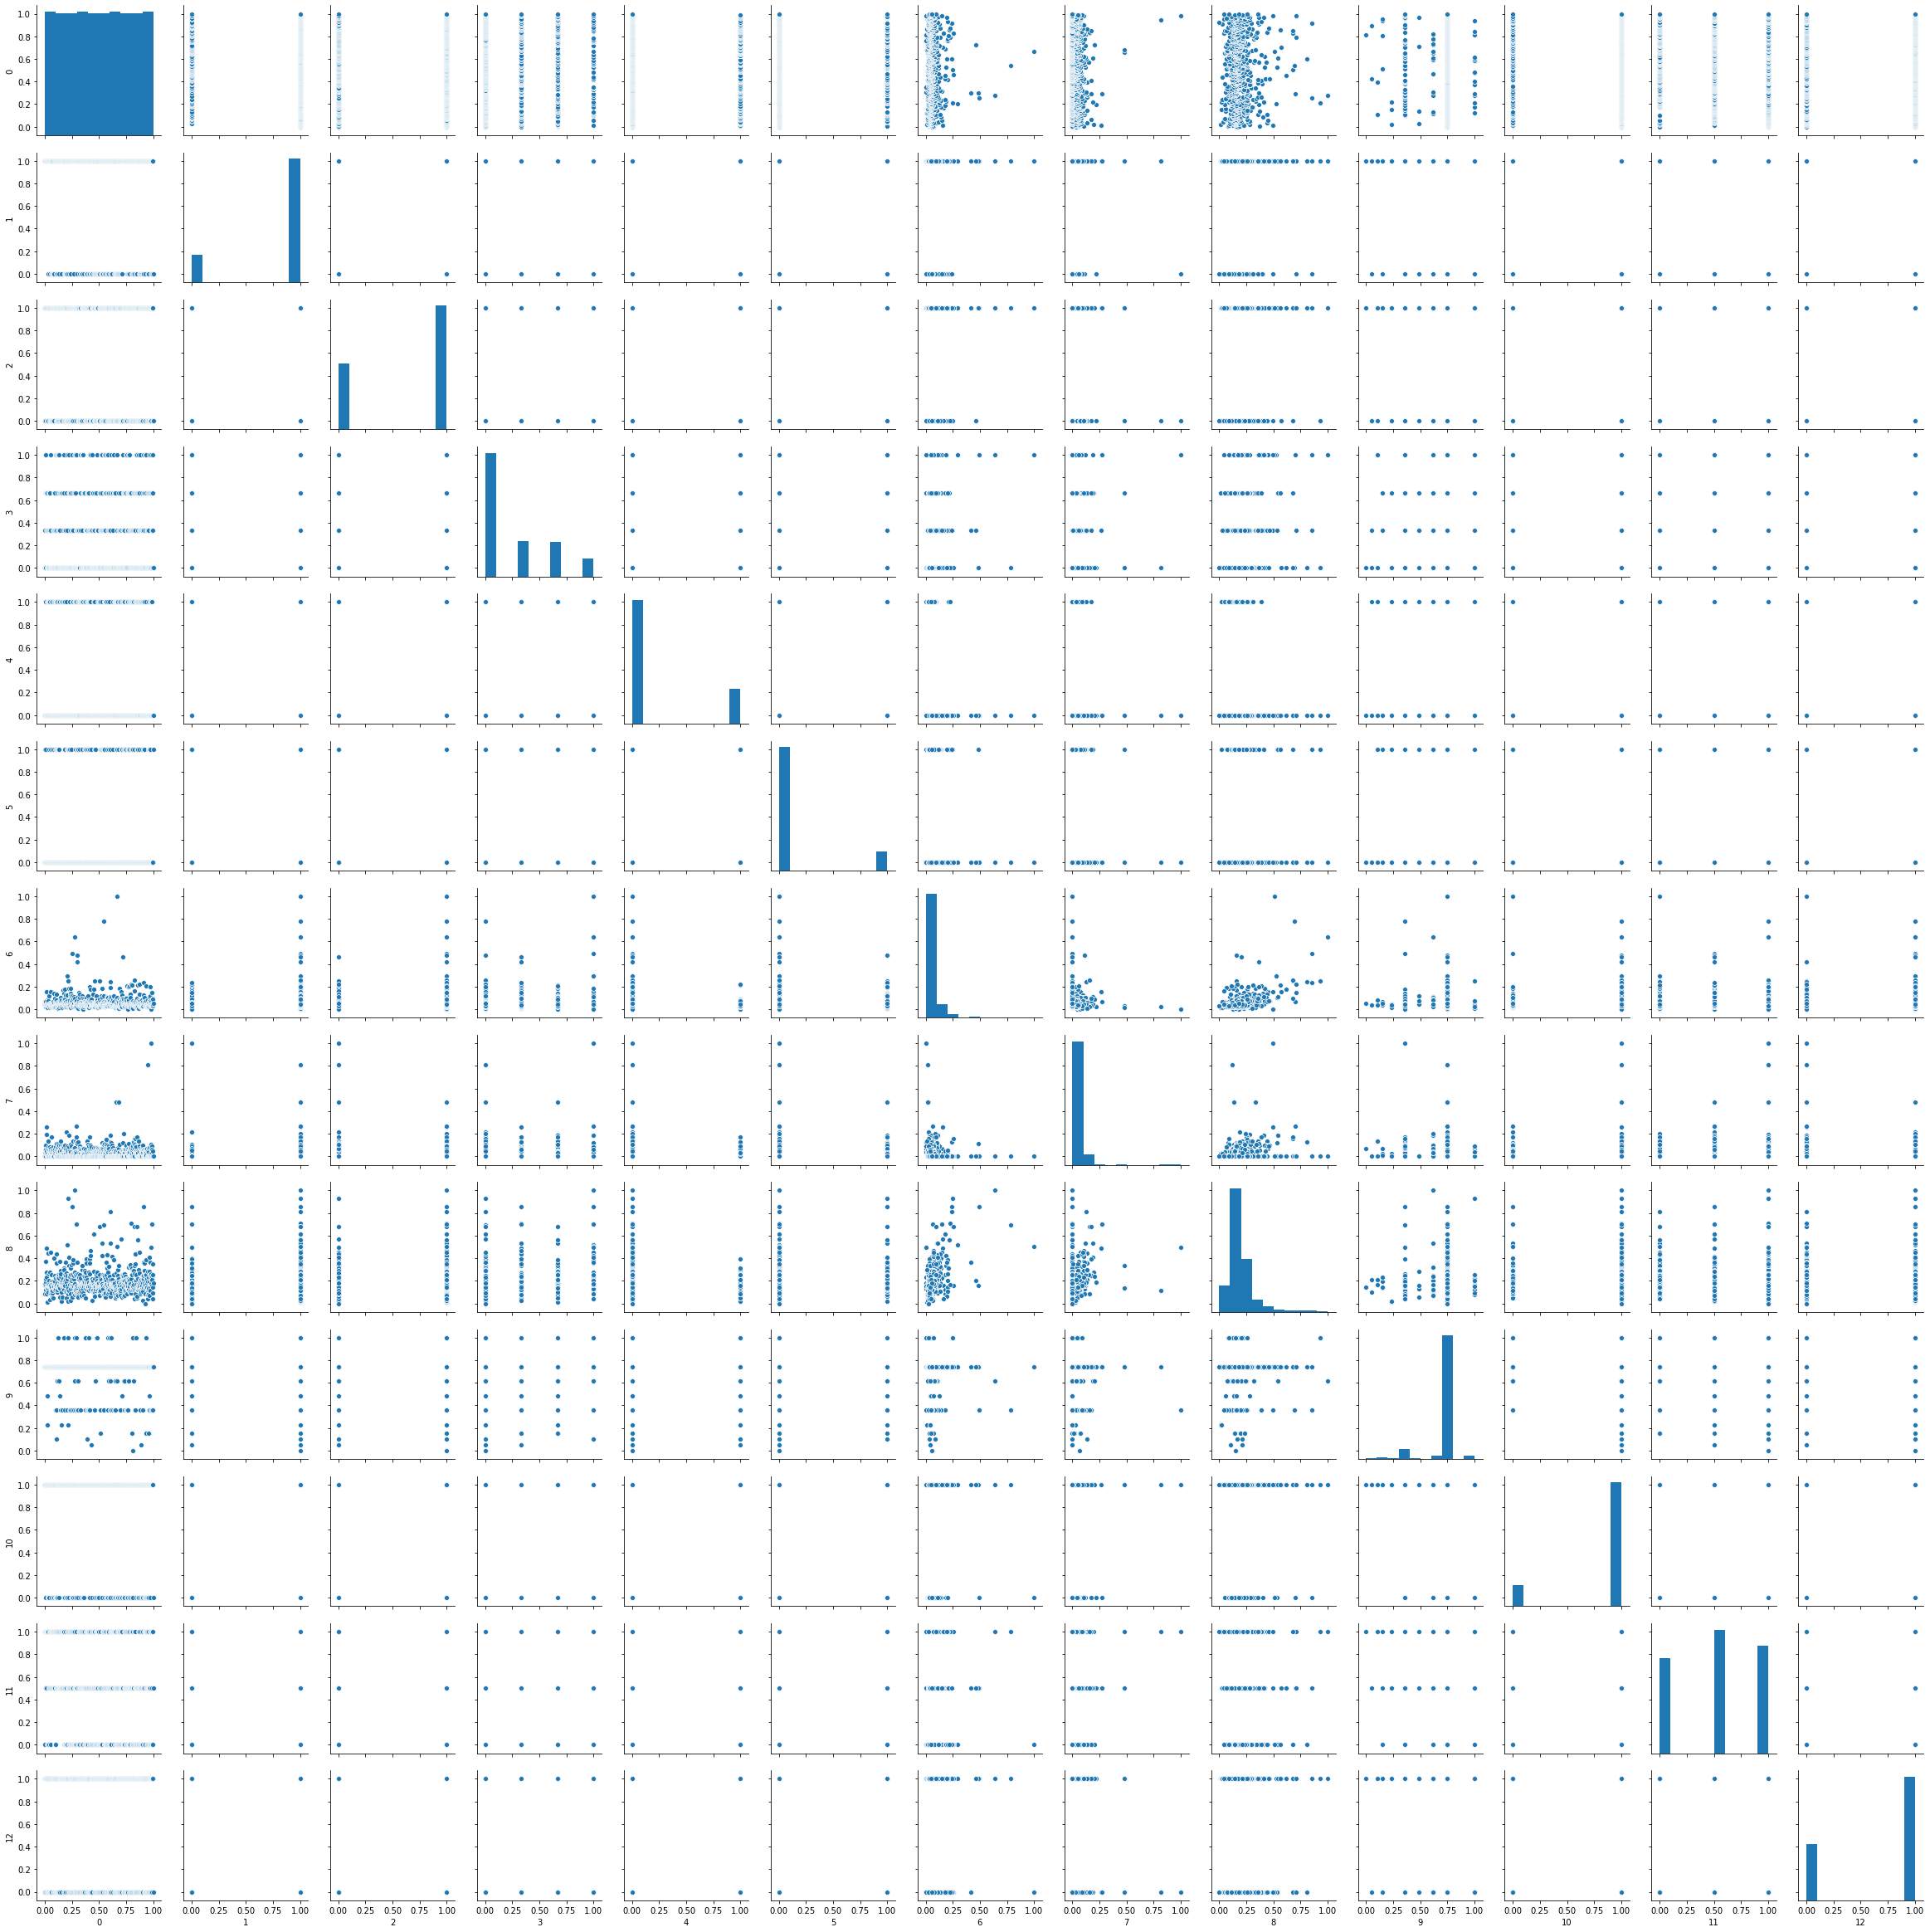

In [36]:
sns.pairplot(df)

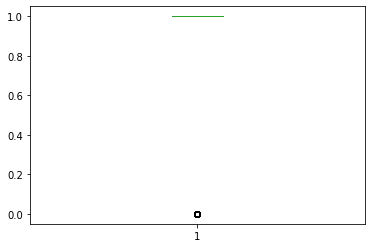

In [37]:
df[1].plot.box()

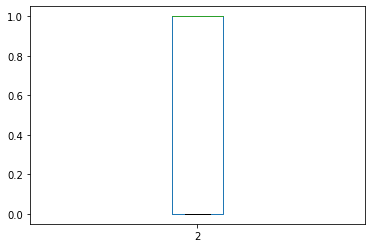

In [38]:
df[2].plot.box()

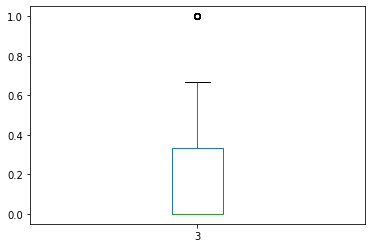

In [39]:
df[3].plot.box()

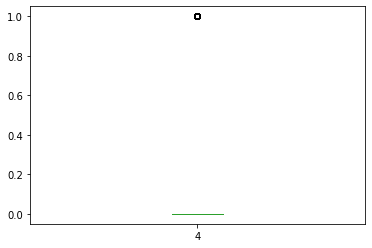

In [40]:
df[4].plot.box()

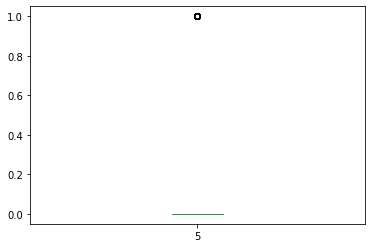

In [41]:
df[5].plot.box()

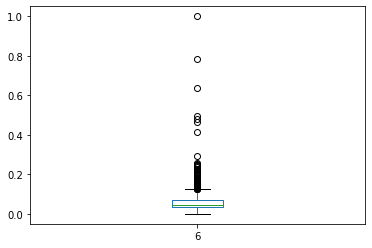

In [42]:
df[6].plot.box()

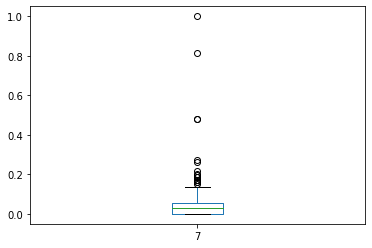

In [43]:
df[7].plot.box()

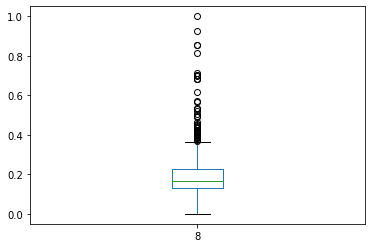

In [44]:
df[8].plot.box()

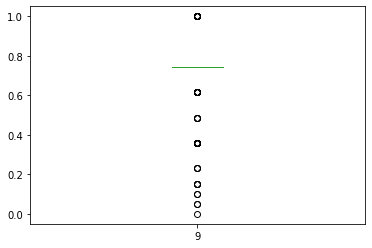

In [45]:
df[9].plot.box()

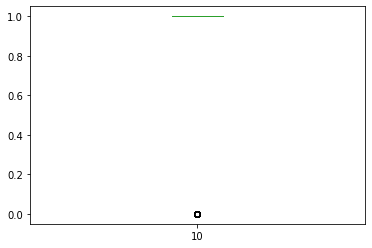

In [46]:
df[10].plot.box()

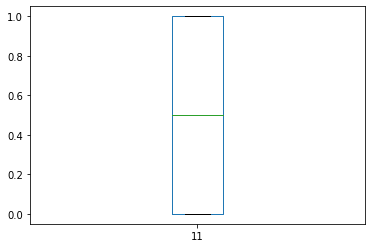

In [47]:
df[11].plot.box()

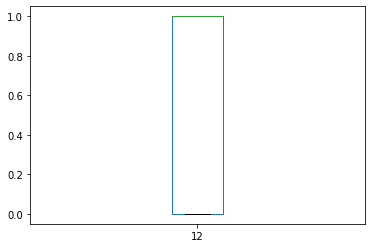

In [48]:
df[12].plot.box()

In [56]:
#removing outliers
from scipy.stats import zscore

In [57]:
z=np.abs(zscore(df))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [58]:
thresholds=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
       8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
      dtype=int64))


In [59]:
df=df[(z<3).all(axis=1)]
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


# TRAINING AND TESTING PHASE

In [61]:
x=df.drop(12,axis=1)
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.160637,0.743590,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
5,0.008157,1.0,1.0,0.666667,0.0,1.0,0.065145,0.100703,0.373372,0.743590,1.0,1.0
6,0.009788,1.0,1.0,0.000000,1.0,0.0,0.027001,0.036384,0.124457,0.743590,1.0,1.0
7,0.011419,1.0,1.0,1.000000,0.0,0.0,0.035696,0.060096,0.215630,0.743590,0.0,0.5
8,0.013051,1.0,1.0,0.666667,0.0,0.0,0.047693,0.036624,0.230101,0.743590,1.0,1.0
10,0.016313,1.0,1.0,0.666667,0.0,0.0,0.037724,0.016800,0.088278,0.743590,1.0,1.0


In [62]:
y=df[12]
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      0.0
8      1.0
10     1.0
11     1.0
12     1.0
13     0.0
15     1.0
16     1.0
17     0.0
18     0.0
19     1.0
20     0.0
21     1.0
22     0.0
23     0.0
24     0.0
25     1.0
26     1.0
27     1.0
28     0.0
29     1.0
30     0.0
31     0.0
      ... 
580    1.0
582    1.0
583    0.0
584    0.0
586    1.0
587    1.0
588    1.0
589    0.0
590    1.0
591    0.0
592    1.0
593    1.0
594    1.0
595    1.0
596    0.0
597    0.0
598    1.0
599    1.0
601    1.0
602    1.0
603    1.0
605    0.0
606    1.0
607    1.0
608    1.0
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: 12, Length: 577, dtype: float64

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=100)

In [271]:
from sklearn.linear_model import LogisticRegression

In [272]:
lg=LogisticRegression()

In [273]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [274]:
predlg=lg.predict(x_test)

In [275]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [276]:
print(accuracy_score(y_test,predlg))

0.8620689655172413


In [277]:
print(confusion_matrix(y_test,predlg))

[[ 8  7]
 [ 1 42]]


In [278]:
print(classification_report(y_test,predlg))

              precision    recall  f1-score   support

         0.0       0.89      0.53      0.67        15
         1.0       0.86      0.98      0.91        43

    accuracy                           0.86        58
   macro avg       0.87      0.76      0.79        58
weighted avg       0.87      0.86      0.85        58



# APPLYING MODEL

In [279]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [280]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7413793103448276
[[ 0 15]
 [ 0 43]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.74      1.00      0.85        43

    accuracy                           0.74        58
   macro avg       0.37      0.50      0.43        58
weighted avg       0.55      0.74      0.63        58



In [281]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8620689655172413
[[ 8  7]
 [ 1 42]]
              precision    recall  f1-score   support

         0.0       0.89      0.53      0.67        15
         1.0       0.86      0.98      0.91        43

    accuracy                           0.86        58
   macro avg       0.87      0.76      0.79        58
weighted avg       0.87      0.86      0.85        58



In [282]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7758620689655172
[[10  5]
 [ 8 35]]
              precision    recall  f1-score   support

         0.0       0.56      0.67      0.61        15
         1.0       0.88      0.81      0.84        43

    accuracy                           0.78        58
   macro avg       0.72      0.74      0.72        58
weighted avg       0.79      0.78      0.78        58



In [283]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8448275862068966
[[ 9  6]
 [ 3 40]]
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67        15
         1.0       0.87      0.93      0.90        43

    accuracy                           0.84        58
   macro avg       0.81      0.77      0.78        58
weighted avg       0.84      0.84      0.84        58



In [241]:
#ROC CURVE
from sklearn.metrics import roc_curve

In [284]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.83957241, 0.7795772 , 0.7953966 , 0.78629374, 0.86491803,
       0.64962597, 0.74606957, 0.82056226, 0.7351991 , 0.7914405 ,
       0.8955074 , 0.82625445, 0.84656647, 0.81881598, 0.65787101,
       0.87749023, 0.16461523, 0.14401535, 0.83431682, 0.7574162 ,
       0.8227829 , 0.78687803, 0.80036824, 0.80712346, 0.82568655,
       0.80192385, 0.0976417 , 0.73528862, 0.83294702, 0.74754881,
       0.73786025, 0.8309538 , 0.11062643, 0.81534899, 0.75177942,
       0.74365555, 0.81457398, 0.74797673, 0.77894736, 0.75819119,
       0.08049695, 0.83267994, 0.13274477, 0.63000163, 0.80436064,
       0.81374096, 0.75052728, 0.69085121, 0.17448071, 0.83398662,
       0.74290482, 0.74475537, 0.69259032, 0.11347772, 0.77837987,
       0.74576811, 0.80181232, 0.15926906])

In [285]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [286]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.06666667 0.06666667 0.13333333
 0.13333333 0.2        0.2        0.26666667 0.26666667 0.33333333
 0.33333333 0.4        0.4        0.46666667 0.46666667 0.86666667
 0.86666667 1.        ]
[0.         0.02325581 0.18604651 0.18604651 0.46511628 0.46511628
 0.51162791 0.51162791 0.53488372 0.53488372 0.72093023 0.72093023
 0.74418605 0.74418605 0.90697674 0.90697674 0.97674419 0.97674419
 1.         1.        ]
[1.8955074  0.8955074  0.83294702 0.83267994 0.80192385 0.80181232
 0.7953966  0.7914405  0.78687803 0.78629374 0.74797673 0.74754881
 0.74606957 0.74576811 0.69259032 0.69085121 0.63000163 0.11347772
 0.11062643 0.08049695]


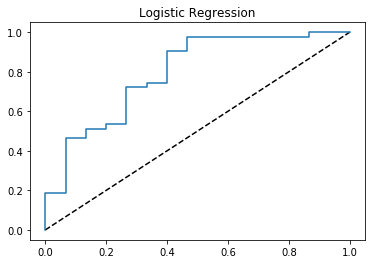

In [287]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="LogisticRegression")
plt.title("Logistic Regression")
plt.show()

In [288]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,svc.predict(x_test))
print(auc_score)

0.7550387596899224


In [289]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(svc,"loan.pkl")

['loan.pkl']